In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate

In [8]:
df=pd.read_csv('ice_cream.csv')
df.head()

,Temperature (°C),Ice Cream Sales (units)
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001
3,-3.949661,37.539845
4,-3.578554,32.284531


In [9]:
X=df[['Temperature (°C)']].values
y=df['Ice Cream Sales (units)'].values

In [20]:
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.25,random_state=42)

In [21]:
maxdeg=5
training_error, validation_error, cross_validation_error = [],[],[]

for d in range(maxdeg+1):
    x_poly=PolynomialFeatures(degree=d).fit_transform(X)
    x_poly_train=PolynomialFeatures(degree=d).fit_transform(X_train)
    x_poly_val=PolynomialFeatures(degree=d).fit_transform(X_val)

    lreg=LinearRegression()
    lreg.fit(x_poly_train,y_train)

    y_train_pred=lreg.predict(x_poly_train)
    y_val_pred=lreg.predict(x_poly_val)
    training_error.append(mean_squared_error(y_train,y_train_pred))
    validation_error.append(mean_squared_error(y_val,y_val_pred))
    mse_score=cross_validate(lreg,x_poly,y,scoring='neg_mean_squared_error',cv=10)
    cross_validation_error.append(-np.mean(mse_score['test_score']))

In [22]:
min_mse = min(validation_error)
best_degree = validation_error.index(min_mse)

In [23]:
min_cross_val_mse = min(cross_validation_error)
best_cross_val_degree = cross_validation_error.index(min_cross_val_mse)

print("The best degree of the model using validation is",best_degree)
print("The best degree of the model using cross-validation is",best_cross_val_degree)

The best degree of the model using validation is 3
The best degree of the model using cross-validation is 2


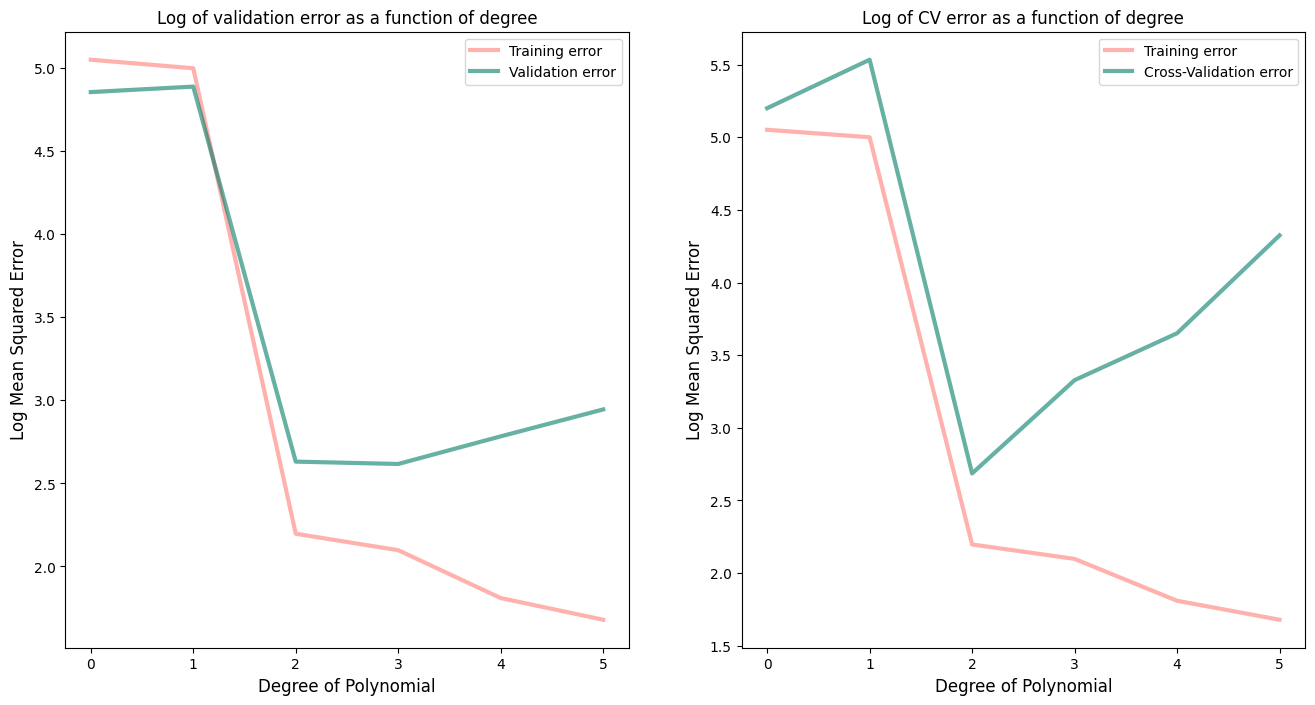

In [24]:
fig, ax = plt.subplots(1,2, figsize=(16,8))

ax[0].plot(range(maxdeg+1), np.log(training_error), label = 'Training error', linewidth=3, color='#FF7E79', alpha=0.6)

ax[0].plot(range(maxdeg+1), np.log(validation_error), label = 'Validation error', linewidth=3, color="#007D66", alpha=0.6)

ax[1].plot(range(maxdeg+1), np.log(training_error), label = 'Training error', linewidth=3, color='#FF7E79', alpha=0.6)


ax[1].plot(range(maxdeg+1), np.log(cross_validation_error), label = 'Cross-Validation error', linewidth=3, color="#007D66", alpha=0.6)


ax[0].set_xlabel('Degree of Polynomial', fontsize=12)
ax[0].set_ylabel('Log Mean Squared Error', fontsize=12)
ax[0].set_title("Log of validation error as a function of degree")

ax[1].set_xlabel('Degree of Polynomial', fontsize=12)
ax[1].set_ylabel('Log Mean Squared Error', fontsize=12)
ax[1].set_title("Log of CV error as a function of degree")

ax[0].legend()
ax[1].legend()
plt.show();